**the purpose of this project is to showcase the power of CNN architucture in dealing with small data and how to avoid overfitting**
***using only 1000 samples for each category***

--------------------------------------------------------------------------------------------------
# Table of contents:

1.   **Dealing with data**:
         *Unzipping the data 
         *making directories for each category for training ,validation and test data(1000 samples  for each category)
          
1.    **Building Basic CNN architecture**
         *visulaiztion of the performance : Loss/accuracy figure
         *interpretation of overfitting from the figure 
1.                           *** Importatnt skill*** 
                ---- **visualization the CNN's layeres** ---
         
1.    **building models using techniques of avoiding overfitting**
          * Data augmentation 
          *+ Dropout
          *visulaiztion of the performance : Loss/accuracy figure
     
  ------------------------------------------------------------------------------------------------
     

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cattttt/1sbnkirc.png
/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


# ***unzipping the data ***



In [2]:
if not os.path.exists("/kaggle/working/train"):
    !unzip -q /kaggle/input/dogs-vs-cats/train.zip


In [3]:
train_path = '/kaggle/working/train'
len(os.listdir(train_path))

25000

# **visualization**

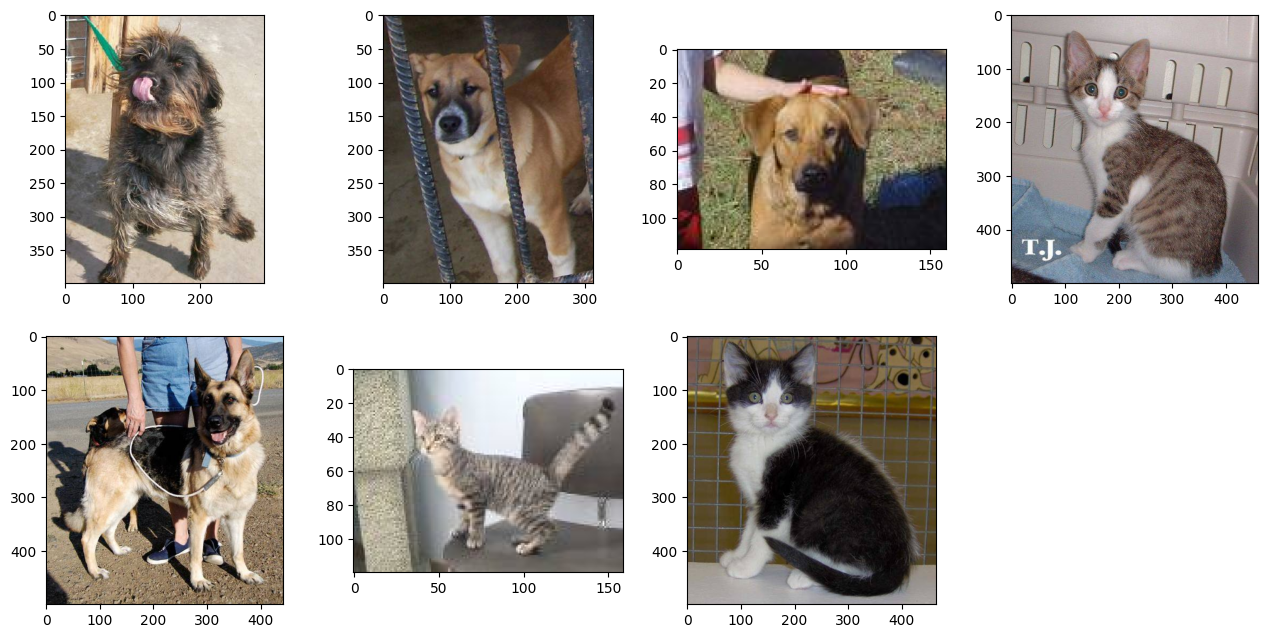

In [4]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt 
import random
images=os.listdir(train_path)
plt.figure(figsize=(16,16))
for i in range(7): 
    img = random.choice([x for x in images])
    fig = plt.subplot(4,4,i+1)
    img = mpimg.imread(os.path.join(train_path, img)) 
    fig.imshow(img)
    
    
    

# **oraganisation of the directories : cats / dogs**


In [5]:
# store our smaller dataset
base_dir ='/kaggle/working//cats_and_dogs_small'
try:
  os.mkdir(base_dir)
except:
  pass

In [6]:
train_dir = os.path.join(base_dir, 'train')
try:
  os.mkdir(train_dir)
except:
  pass  
validation_dir = os.path.join(base_dir, 'validation')
try:
  os.mkdir(validation_dir)
except:
  pass   
test_dir = os.path.join(base_dir, 'test')
try:
  os.mkdir(test_dir)
except:
  pass   

In [7]:
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
try:
  os.mkdir(train_cats_dir)
except:
  pass   

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
try:
  os.mkdir(train_dogs_dir)
except:
  pass   

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
try:
  os.mkdir(validation_cats_dir)
except:
  pass 

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
try:
  os.mkdir(validation_dogs_dir)
except:
  pass   

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
try:
  os.mkdir(test_cats_dir)
except:
  pass   

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
try:
  os.mkdir(test_dogs_dir)
except:
  pass   

In [8]:
images[:20]

['dog.9885.jpg',
 'dog.12010.jpg',
 'dog.8609.jpg',
 'dog.6220.jpg',
 'cat.3767.jpg',
 'cat.4151.jpg',
 'cat.1355.jpg',
 'dog.12387.jpg',
 'cat.7808.jpg',
 'cat.4990.jpg',
 'cat.10189.jpg',
 'cat.1967.jpg',
 'cat.11972.jpg',
 'dog.9462.jpg',
 'cat.9864.jpg',
 'cat.8990.jpg',
 'dog.10341.jpg',
 'cat.1244.jpg',
 'dog.1954.jpg',
 'dog.10079.jpg']

In [9]:
import shutil
#store only 1000 samples for each category for training data 

fnames_dog=['dog.{}.jpg'.format(i) for i in range(1000) ]
fnames_cat=['cat.{}.jpg'.format(i) for i in range(1000) ]
for fname in fnames_dog :
    src = os.path.join(train_path, fname)
    path=os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src,path)
for fname in fnames_cat:
    src = os.path.join(train_path, fname)
    path=os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,path)
    

    

In [10]:
#store only 500 samples for each category for validation data 
fnames_cat = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
fnames_dog = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames_dog :
    src = os.path.join(train_path, fname)
    path=os.path.join(validation_dogs_dir,fname)
    shutil.copyfile(src,path)
for fname in fnames_cat:
    src = os.path.join(train_path, fname)
    path=os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src,path)
    


In [11]:
#store only 500 samples for each category for vtest data 
fnames_cat = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
fnames_dog = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames_dog :
    src = os.path.join(train_path, fname)
    path=os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src,path)
for fname in fnames_cat:
    src = os.path.join(train_path, fname)
    path=os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,path)

In [12]:
#verification
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total training cat images:', len(os.listdir(validation_cats_dir)))
print('total training cat images:', len(os.listdir(validation_dogs_dir)))
print('total training cat images:', len(os.listdir(test_cats_dir)))
print('total training cat images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total training cat images: 500
total training cat images: 500
total training cat images: 500
total training cat images: 500


# 1.Builduing CNN Architucture 

**Building our network**


In [13]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [15]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# **Data preprocessing**

In [16]:
#python generator 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


**fitting the data**

In [18]:

history = model.fit(
      train_generator,
    #cuz there are 2000 sapmples=100*20(batch-size(20images))
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 14s 50ms/step - loss: 1.0266 - acc: 0.4785 - val_loss: 0.6931 - val_acc: 0.4910
Epoch 2/30
100/100 [==============================] - 5s 47ms/step - loss: 0.6930 - acc: 0.5105 - val_loss: 0.6925 - val_acc: 0.4790
Epoch 3/30
100/100 [==============================] - 5s 47ms/step - loss: 0.7113 - acc: 0.5245 - val_loss: 0.6897 - val_acc: 0.5090
Epoch 4/30
100/100 [==============================] - 5s 47ms/step - loss: 0.6908 - acc: 0.5425 - val_loss: 0.6891 - val_acc: 0.5260
Epoch 5/30
100/100 [==============================] - 5s 47ms/step - loss: 0.6807 - acc: 0.5710 - val_loss: 0.6685 - val_acc: 0.6140
Epoch 6/30
100/100 [==============================] - 5s 46ms/step - loss: 0.8556 - acc: 0.5690 - val_loss: 0.6860 - val_acc: 0.5660
Epoch 7/30
100/100 [==============================] - 5s 45ms/step - loss: 0.6785 - acc: 0.5910 - val_loss: 0.6991 - val_acc: 0.5450
Epoch 8/30
100/100 [==============================] - 5s 45ms/step -

In [19]:
#saving the model
import joblib
joblib.dump(model, 'model.pkl')


['model.pkl']

# ****evaluation of the performance ****

**plotting the accuracy/loss of the model over training / validation data**

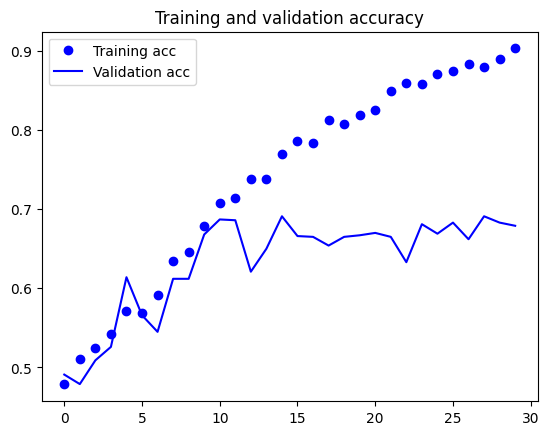

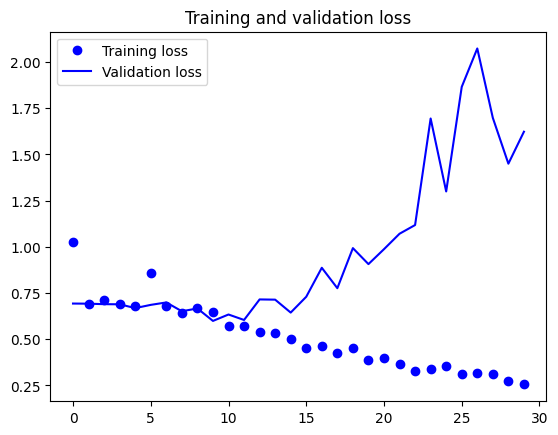

In [20]:
import matplotlib.pyplot as plt
#acc for the training data
acc = history.history['acc']
#acc for the validation data
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 2.interpretation of the performance 

**as we see , there is overfitting ( the training acc increases lineraly untill it reaches 100% and the loss reaches 0% (decreasing linearly)**


techniques to this problem : 
1. **Data augmentation (adding more data from the original)**
1. **droping out**
1. **regularization**
1. **transfer learning models**


# important skill:
# Visualizing intermediate activations

**For a specefic image :**

In [21]:
img_path = '/kaggle/input/cattttt/1sbnkirc.png'

# We preprocess the image into a 4D tensor
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.


print(img_tensor.shape)

(1, 150, 150, 3)


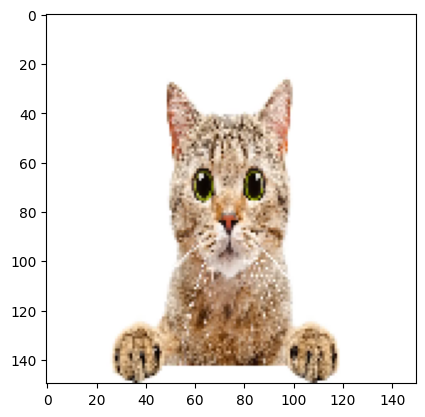

In [22]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [23]:
from tensorflow.keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [24]:
# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

1/1 [==============================] - 0s 182ms/step


In [25]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


It's a 148x148 feature map with 32 channels

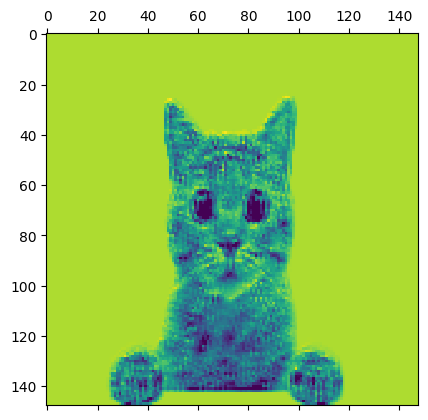

In [26]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

We can conclude that the kernel of this resulat is for detecting  the edges , 

# Complete visualization of all activations 

/tmp/ipykernel_27/179984408.py:30: RuntimeWarning: invalid value encountered in divide
  channel_image /= channel_image.std()


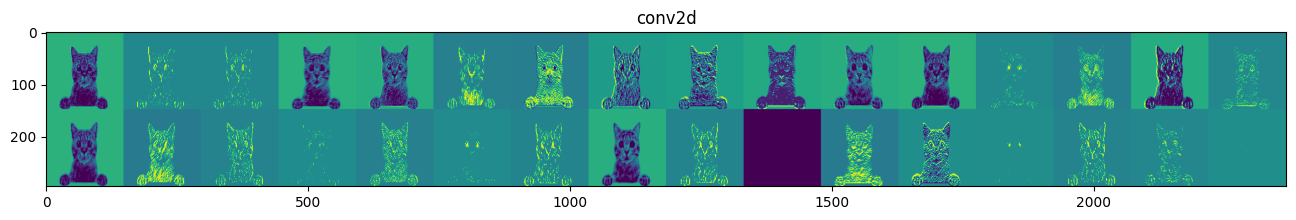

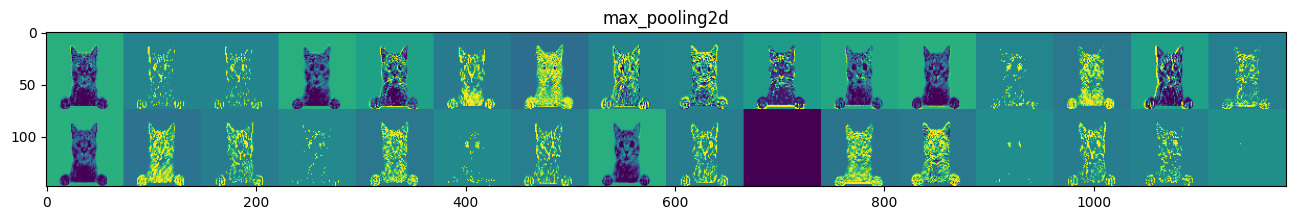

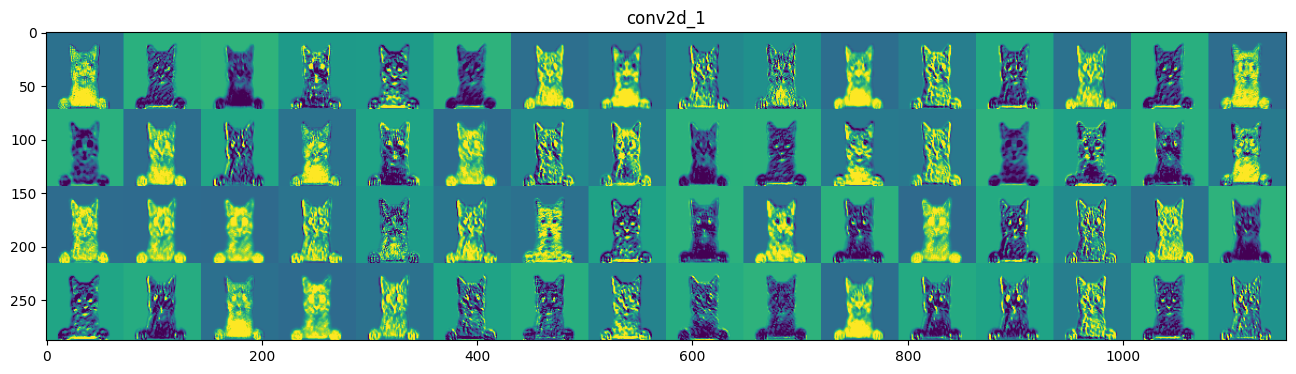

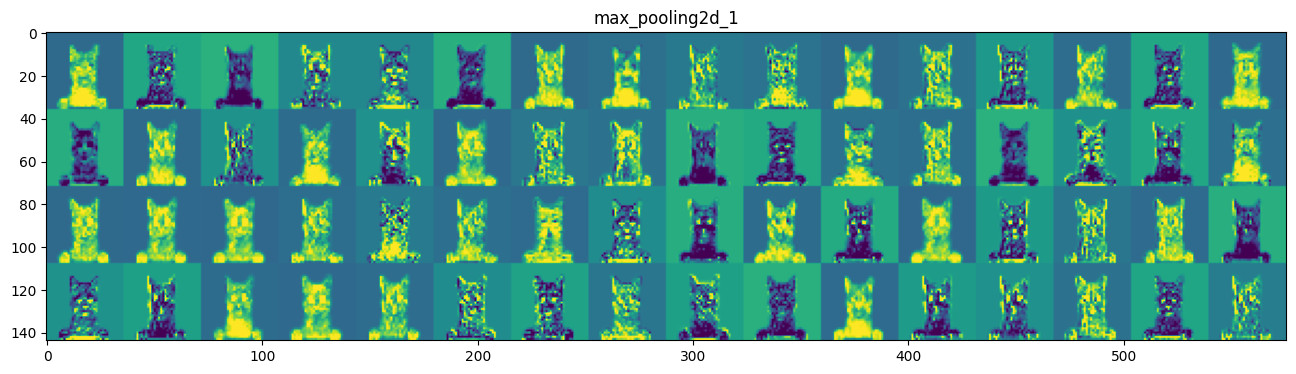

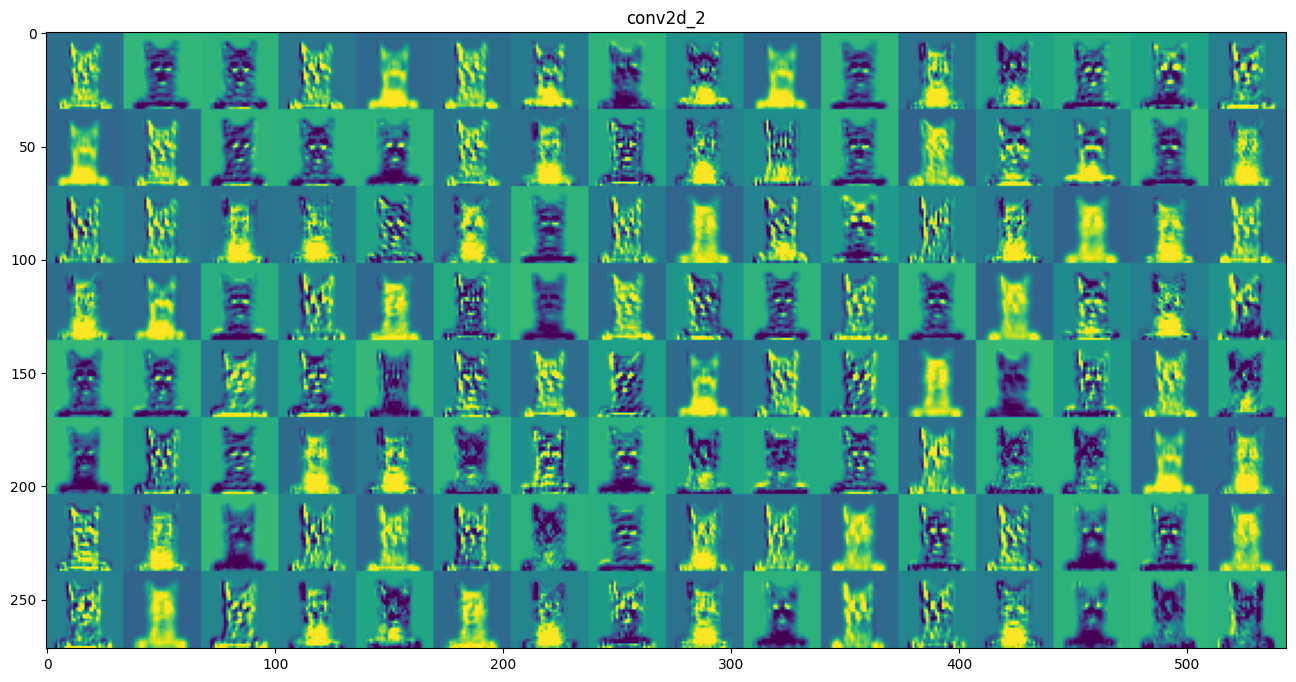

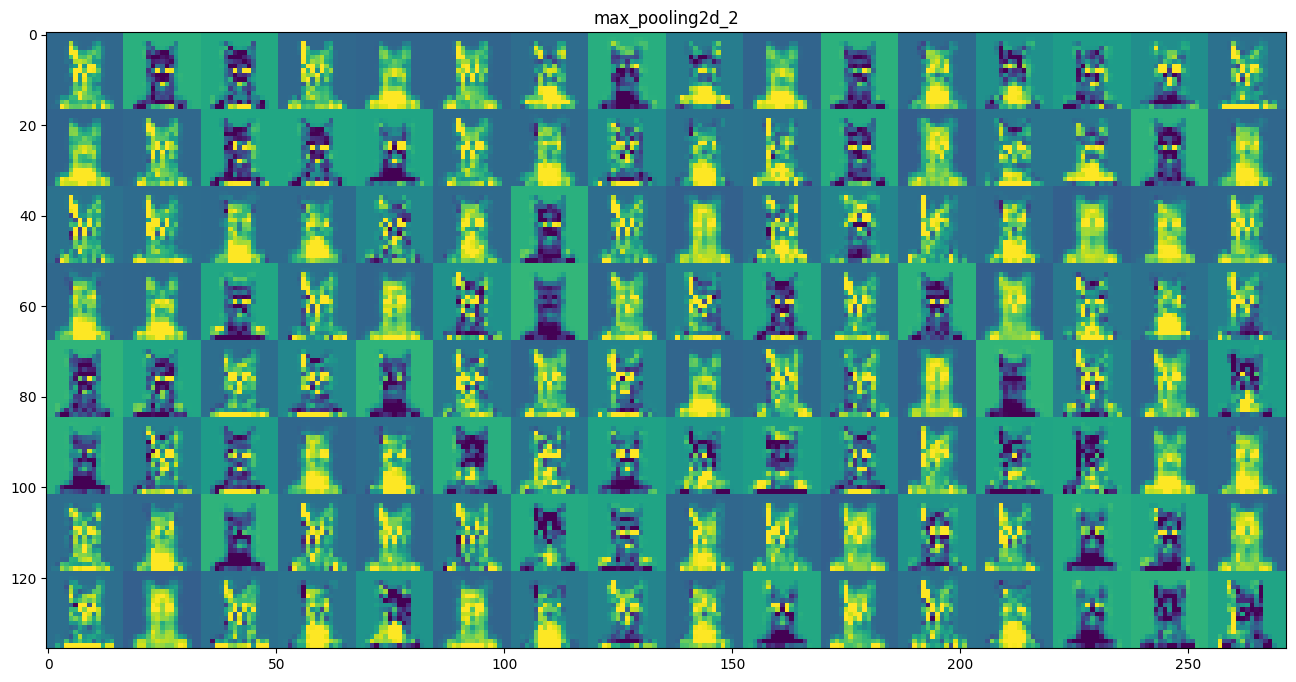

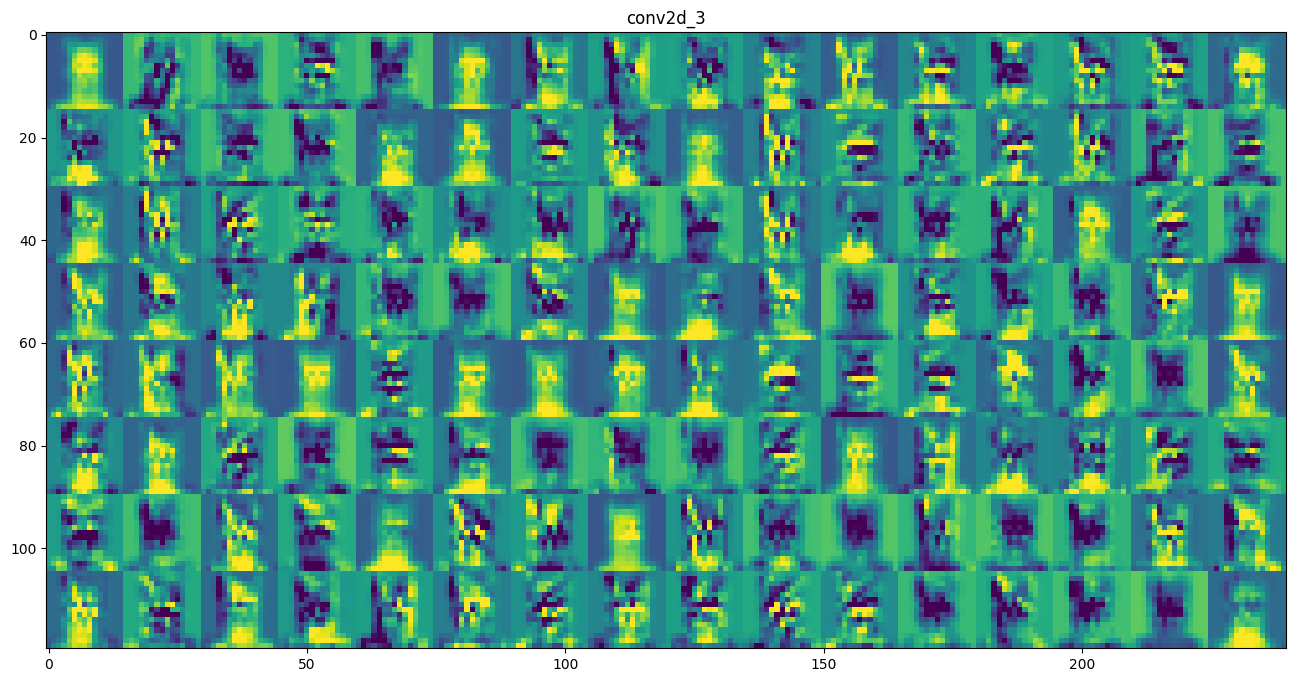

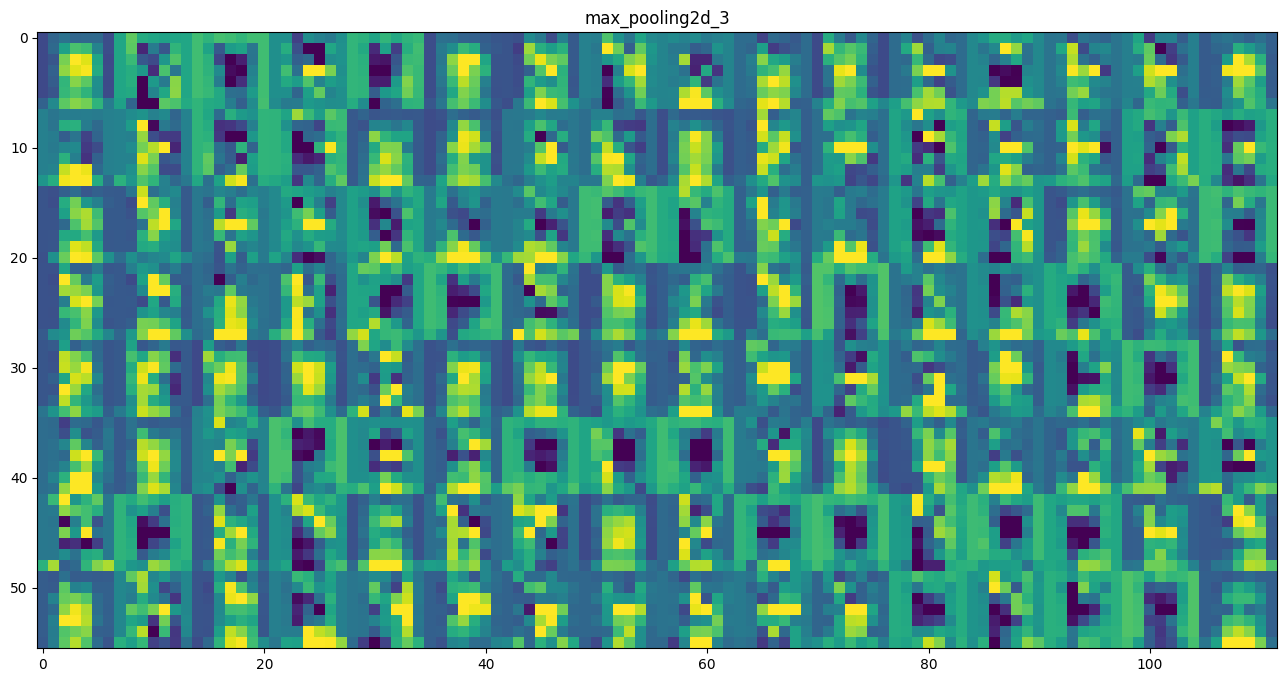

In [27]:
import tensorflow.keras as keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

# data augmentation

In [28]:
datagen = ImageDataGenerator(rescale=1/255,
    #transformers of the image , randomly 
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      #filling the missing pixels with the values of the nearst pixels when the zoom  for example                     
      fill_mode='nearest')



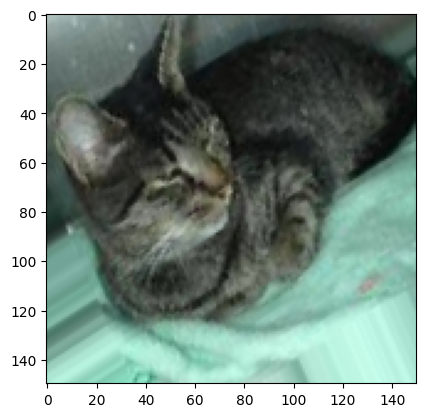

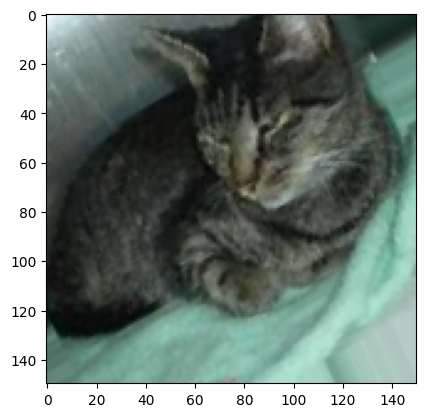

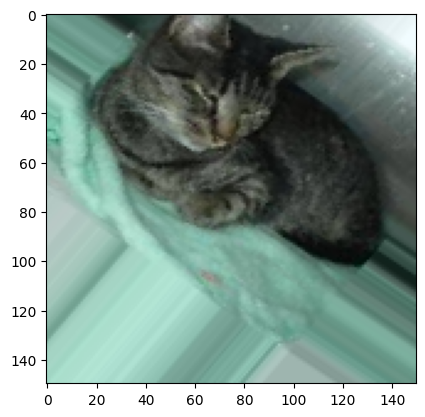

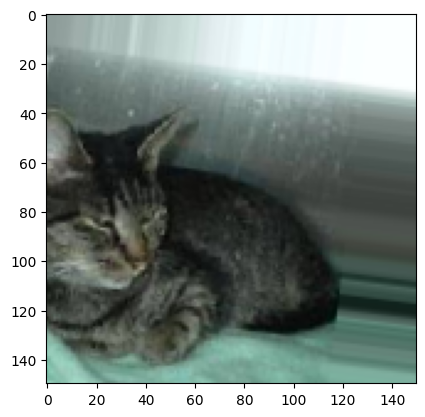

In [29]:
#looking the one augemented image 
from tensorflow.keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_pth=fnames[0]
img = image.load_img(img_pth, target_size=(150, 150))


#numpy array
x_img = image.img_to_array(img)
x_img = x_img.reshape((1,) + x_img.shape)
i=0

for batch in datagen.flow(x_img, batch_size=1):
    plt.figure(i)
    plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i==4:
        break 
plt.show()

    



# 2.Model with data augmentation and dropout

In [30]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512))#, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
print(model.summary())
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [31]:
#using data augementation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')



validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30


/tmp/ipykernel_27/2170720380.py:30: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 15s 135ms/step - loss: 3.5116 - acc: 0.4835 - val_loss: 1.3129 - val_acc: 0.5050
Epoch 2/30
100/100 [==============================] - 14s 136ms/step - loss: 0.7712 - acc: 0.5150 - val_loss: 0.6868 - val_acc: 0.5460
Epoch 3/30
100/100 [==============================] - 13s 134ms/step - loss: 0.6888 - acc: 0.5530 - val_loss: 0.7004 - val_acc: 0.5500
Epoch 4/30
100/100 [==============================] - 13s 135ms/step - loss: 0.6880 - acc: 0.5860 - val_loss: 0.6516 - val_acc: 0.6350
Epoch 5/30
100/100 [==============================] - 13s 134ms/step - loss: 0.6938 - acc: 0.5720 - val_loss: 0.6464 - val_acc: 0.6440
Epoch 6/30
100/100 [==============================] - 13s 135ms/step - loss: 0.6760 - acc: 0.5950 - val_loss: 0.6421 - val_acc: 0.6300
Epoch 7/30
100/100 [==============================] - 13s 132ms/step - loss: 0.6676 - acc: 0.6125 - val_loss: 0.6381 - val_acc: 0.6440
Epoch 8/30
100/100 [==============================] - 13s 133ms/st

# #plotting the acc/loss (model using data augmenation )

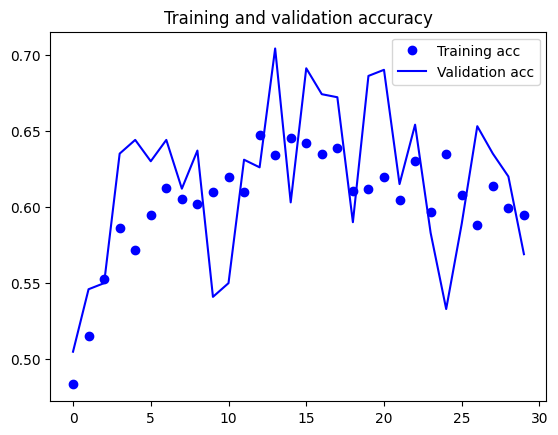

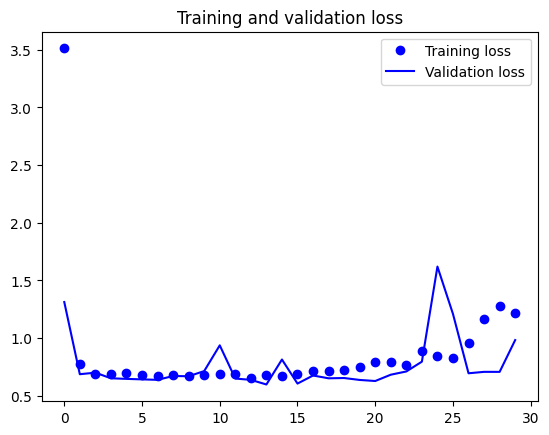

In [32]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Transfer Learning :MobileNet 
    1. Using Data Augmentation 
    2.adding dropout



**building network**

In [33]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Dropout

# Load MobileNetV2 as the base model (without the top layers)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# UnFreeze FEw layers of the base model
for layer in base_model.layers[:-23]:
    layer.trainable = False

# Create a custom CNN architecture on top of MobileNetV2
model = Sequential()

# Add the MobileNetV2 base model
model.add(base_model)

# Add a Global Average Pooling layer to reduce spatial dimensions
model.add(GlobalAveragePooling2D())

# Add fully connected layers for classification
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification (cat/dog)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


9406464/9406464 [==============================] - 1s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_4 (Dense)             (None, 512)               655872    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                         

# Processing data 

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Define image size and batch size
img_size = (224, 224)
batch_size = 32

# Create data generators with augmentation for training data
train_datagen = ImageDataGenerator(
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'  # Adjust based on your task
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'  # Adjust based on your task
)


# Define EarlyStopping callback

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,  # Adjust as needed
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,  callbacks=[early_stopping] )


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/10
62/62 [==============================] - 15s 113ms/step - loss: 0.6294 - accuracy: 0.6916 - val_loss: 2.9789 - val_accuracy: 0.5161
Epoch 2/10
62/62 [==============================] - 6s 91ms/step - loss: 0.4276 - accuracy: 0.8034 - val_loss: 2.1461 - val_accuracy: 0.6300
Epoch 3/10
62/62 [==============================] - 6s 89ms/step - loss: 0.3491 - accuracy: 0.8501 - val_loss: 0.9890 - val_accuracy: 0.6986
Epoch 4/10
62/62 [==============================] - 6s 90ms/step - loss: 0.2759 - accuracy: 0.8796 - val_loss: 0.8559 - val_accuracy: 0.7581
Epoch 5/10
62/62 [==============================] - 6s 89ms/step - loss: 0.1920 - accuracy: 0.9217 - val_loss: 3.1157 - val_accuracy: 0.6250
Epoch 6/10
62/62 [==============================] - 6s 89ms/step - loss: 0.1619 - accuracy: 0.9400 - val_loss: 1.5126 - val_accuracy: 0.7671
Epoch 7/10
62/62 [==============================] - 6s 91ms/step - l

# Plotting loss/accuracy for validation/train data 

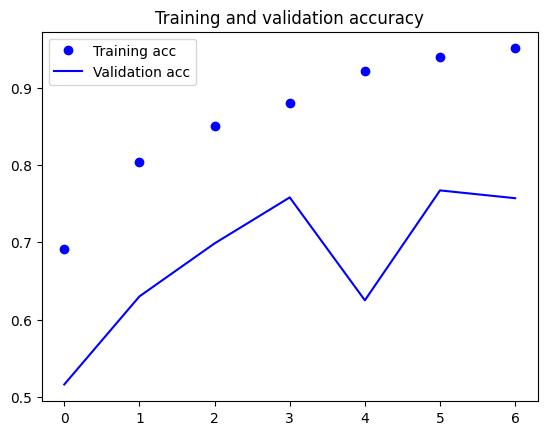

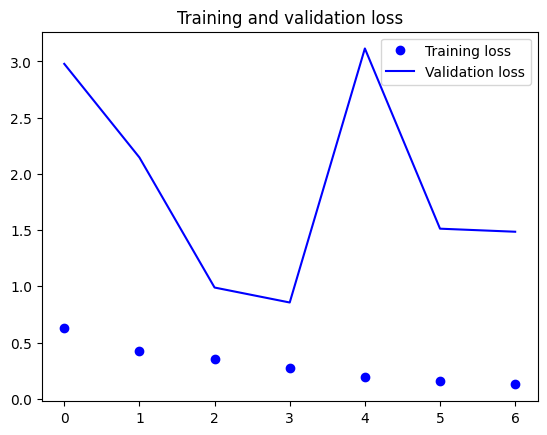

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Evaluation of test data

In [36]:
test= ImageDataGenerator(rescale=1./255)

test_generator = test.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'  # Adjust based on your task
)



acc = model.evaluate(test_generator)
print("Model accuracy on test data:", acc[1] * 100, "%")


Found 1000 images belonging to 2 classes.
32/32 [==============================] - 2s 73ms/step - loss: 0.8222 - accuracy: 0.7580
Model accuracy on test data: 75.80000162124634 %


**Still overfitting**

1. Let's hypertunne somme parameters like adding more options for data augmenetation
1. change the architucture of the model

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the pre-trained MobileNet model without the top (fully connected) layers
base_model = MobileNet(weights='imagenet', include_top=False)

# Create a Sequential model
model = Sequential()

# Add the MobileNet base model to the Sequential model
model.add(base_model)

# Add custom layers for binary classification
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the data using generators
train_generator = train_datagen.flow_from_directory(
    train_dir,  
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))




17225924/17225924 [==============================] - 1s 0us/step
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/10
63/63 [==============================] - 28s 397ms/step - loss: 0.2973 - accuracy: 0.9005 - val_loss: 0.0571 - val_accuracy: 0.9810
Epoch 2/10
63/63 [==============================] - 24s 385ms/step - loss: 0.0869 - accuracy: 0.9620 - val_loss: 0.0583 - val_accuracy: 0.9770
Epoch 3/10
63/63 [==============================] - 24s 385ms/step - loss: 0.0767 - accuracy: 0.9665 - val_loss: 0.0461 - val_accuracy: 0.9830
Epoch 4/10
63/63 [==============================] - 24s 383ms/step - loss: 0.0605 - accuracy: 0.9755 - val_loss: 0.1088 - val_accuracy: 0.9660
Epoch 5/10
63/63 [==============================] - 24s 385ms/step - loss: 0.1104 - accuracy: 0.9600 - val_loss: 0.0460 - val_accuracy: 0.9800
Epoch 6/10
63/63 [==============================] - 24s 383ms/step - loss: 0.0614 - accuracy: 0.9760 - val_loss: 0.0497 - val_accuracy: 

In [38]:
# Evaluate the model on test data
test_generator = test_datagen.flow_from_directory(
    test_dir,  
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test accuracy: {test_acc}')

Found 1000 images belonging to 2 classes.
32/32 [==============================] - 2s 61ms/step - loss: 0.0389 - accuracy: 0.9820
Test accuracy: 0.9819999933242798


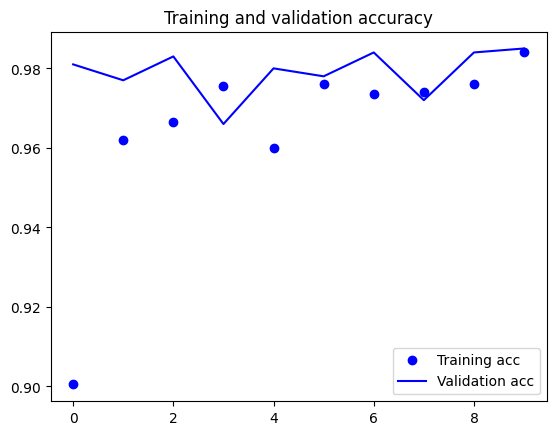

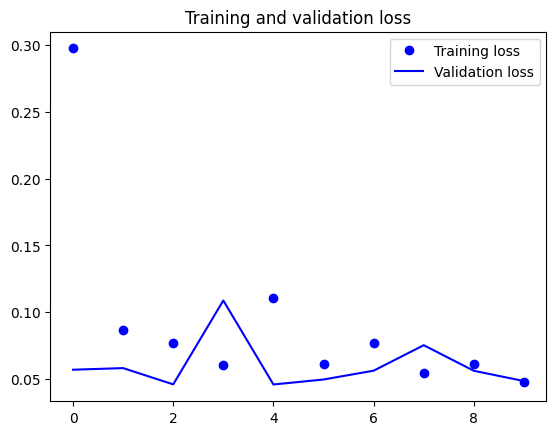

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Predcition(Test data)

> from tensorflow.keras.preprocessing import image
> #scaling data test
> test=os.listdir(test_path)
> fnames = [os.path.join('/kaggle/working/test1', fname) for fname in test]
> submission=[]
> for i in range (len(fnames)): 
>     
>     img = image.load_img(fnames[i], target_size=(150, 150))
>     x_img = image.img_to_array(img)
>     x_img = x_img.reshape((1,) + x_img.shape)
>     x_img=x_img/255
>     predictions=model.predict(x_img)
>     class_index = np.argmax(predictions)
>     submission.append({'id':i ,'label':class_index})
> 
> 
> 
>     
>     
>     
>     
> 
> 
> 

# Submission file

submission = pd.DataFrame(submission)
submission.to_csv('submission.csv', index=False)
